# Setup & Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-dark-palette')

df = pd.read_csv('sales_data.csv')
print(df.head())

  Month Product  Units_Sold  Revenue  Profit
0   Jan  Laptop         150   150000   30000
1   Jan  Mobile         300   120000   24000
2   Jan  Tablet         100    50000    8000
3   Feb  Laptop         180   180000   36000
4   Feb  Mobile         250   100000   20000


# Line Chart - Laptop Revenue Trend

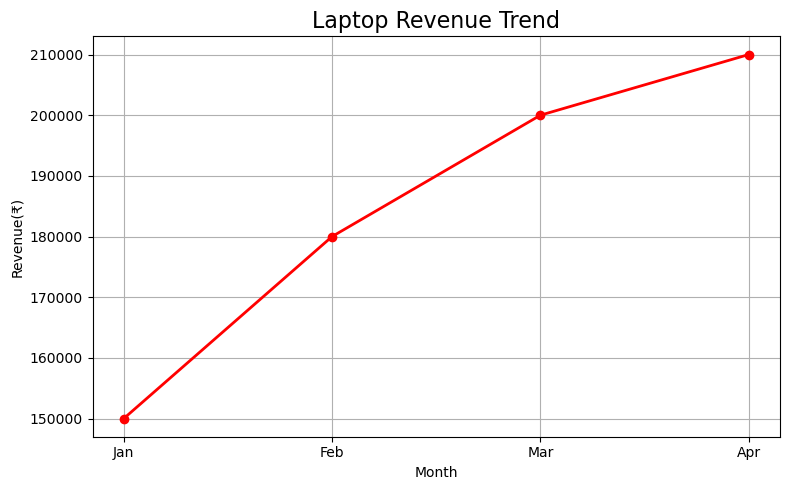

In [2]:
laptop_data = df.query("Product == 'Laptop'")

plt.figure(figsize = (8, 5))
plt.plot(laptop_data['Month'], laptop_data['Revenue'], color = 'red',
         marker = 'o', linewidth = 2)
plt.title('Laptop Revenue Trend', fontsize = 16)
plt.xlabel('Month')
plt.ylabel('Revenue(₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Chart - April Revenue

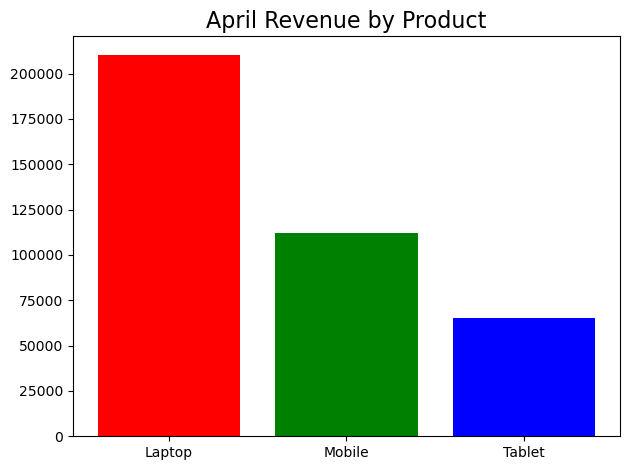

In [3]:
april_data = df.query("Month == 'Apr'")

plt.bar(april_data['Product'], april_data['Revenue'], color=['red','green','blue'])
plt.title("April Revenue by Product", fontsize = 16)
plt.tight_layout()
plt.show()

# Grouped Bar Chart — Monthly Units Sold by Product

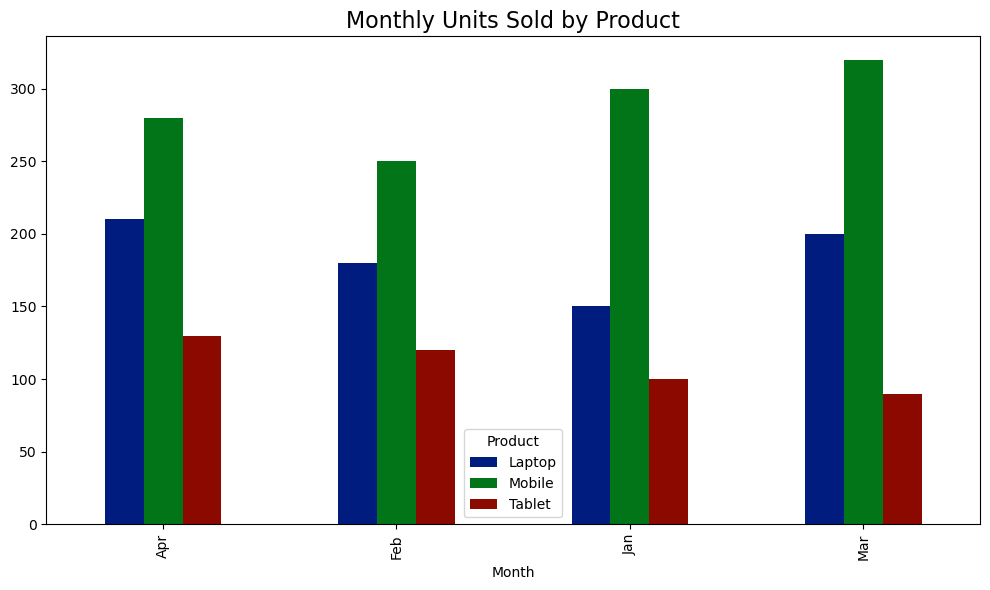

In [4]:
pivot_data = df.pivot(index='Month', columns='Product', values='Units_Sold')
pivot_data.plot(kind='bar', figsize=(10,6))
plt.title("Monthly Units Sold by Product", fontsize = 16)
plt.tight_layout()
plt.show()

 # Histogram — Distribution of Revenue

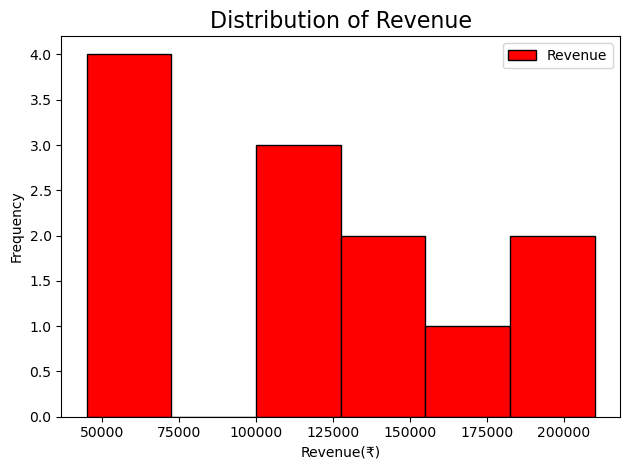

In [5]:
plt.hist(df['Revenue'], bins = 6, edgecolor = 'black', color = 'red', label = 'Revenue')
plt.title("Distribution of Revenue", fontsize = 16)
plt.xlabel("Revenue(₹)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.legend()
plt.show()

# Pie Chart — Profit Share in March

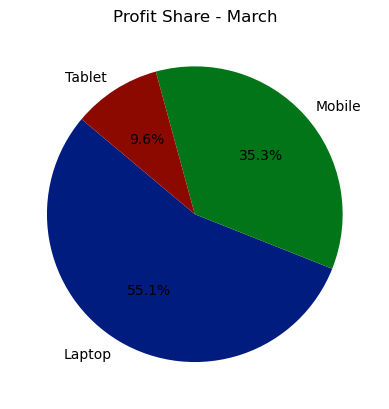

In [6]:
march_profit = df.query("Month == 'Mar'")

plt.pie(march_profit['Profit'], labels = march_profit['Product'],
        autopct='%1.1f%%', startangle = 140)
plt.title("Profit Share - March")
plt.show()

 # Stacked Area Chart — Units Sold Over Time

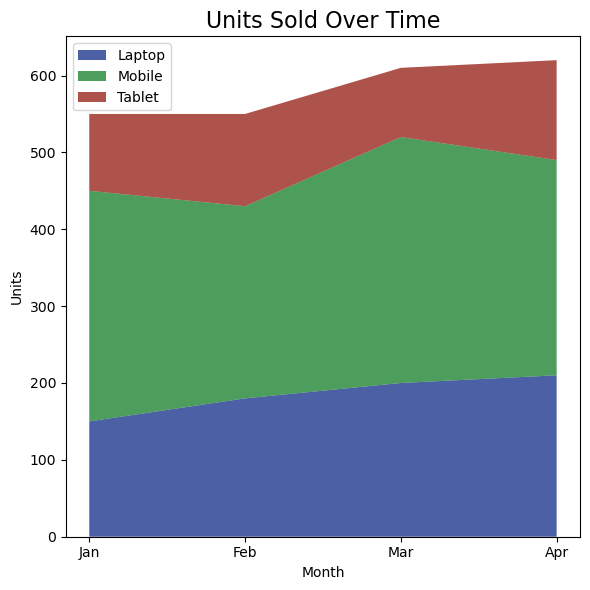

In [7]:
months = df['Month'].unique()
laptop_units = df[df['Product'] == 'Laptop']['Units_Sold']
mobile_units = df[df['Product'] == 'Mobile']['Units_Sold']
tablet_units = df[df['Product'] == 'Tablet']['Units_Sold']

labels = ['Laptop', 'Mobile', 'Tablet']

plt.figure(figsize = (6, 6))
plt.stackplot(months, laptop_units, mobile_units, tablet_units, labels = labels, alpha = 0.7,)
plt.title("Units Sold Over Time", fontsize = 16)
plt.xlabel("Month")
plt.ylabel("Units")
plt.tight_layout()
plt.legend(loc = 'upper left')
plt.show()

# Error Bars — Simulating Sales Uncertainty

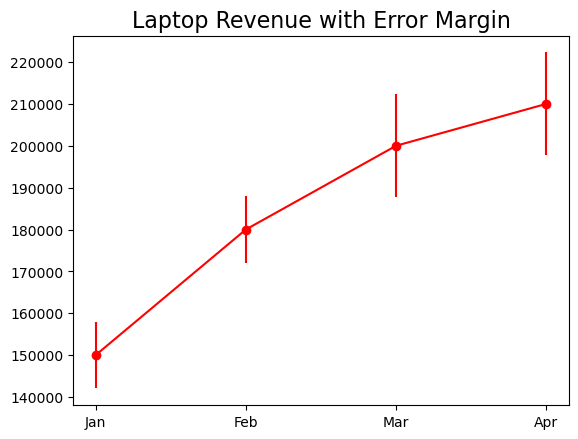

In [8]:
laptop_rev = laptop_data['Revenue']
error = np.random.randint(5000, 15000, size = len(laptop_rev))
plt.errorbar(laptop_data['Month'], laptop_rev, yerr = error, fmt = '-o', color = 'red')
plt.title("Laptop Revenue with Error Margin", fontsize = 16)
plt.show()

# Scatter Plot — Units vs Profit

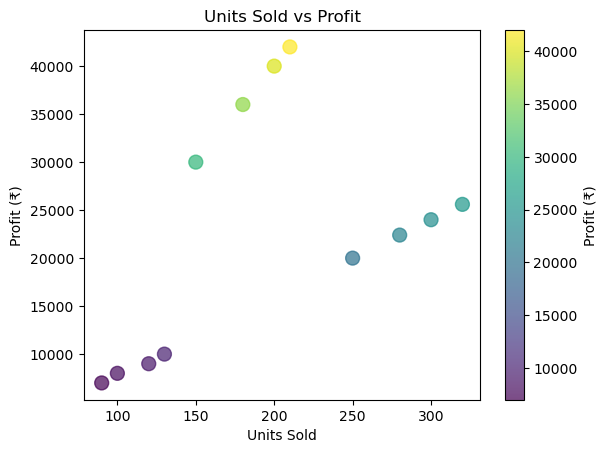

In [9]:
plt.scatter(df['Units_Sold'], df['Profit'], c=df['Profit'], cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label='Profit (₹)')
plt.title("Units Sold vs Profit")
plt.xlabel("Units Sold")
plt.ylabel("Profit (₹)")
plt.show()

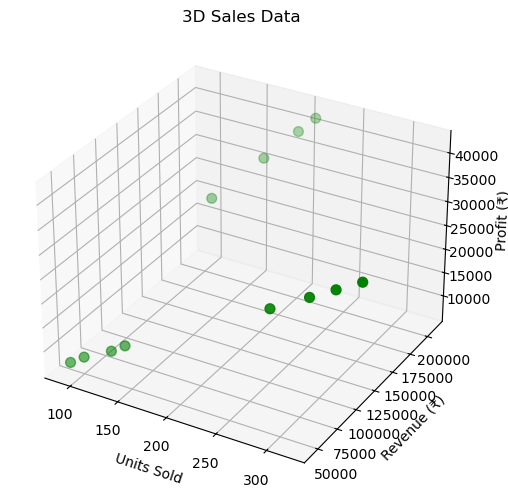

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Units_Sold'], df['Revenue'], df['Profit'], c='green', s=50)
ax.set_xlabel("Units Sold")
ax.set_ylabel("Revenue (₹)")
ax.set_zlabel("Profit (₹)")
ax.set_title("3D Sales Data")
plt.show()

# Custom Ticks & Formatting

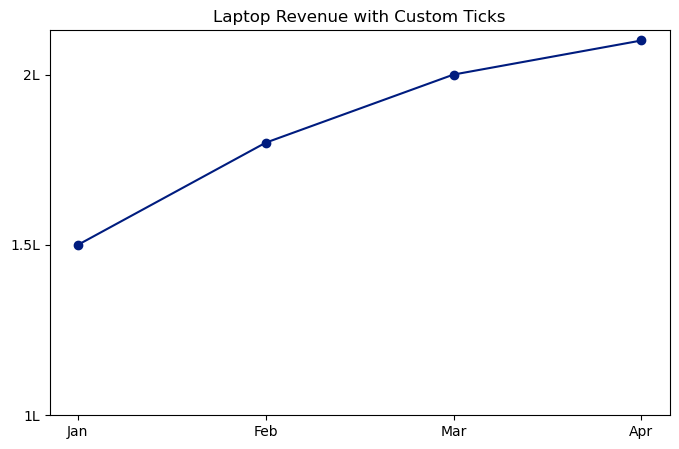

In [11]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(laptop_data['Month'], laptop_data['Revenue'], marker = 'o')

ax.set_xticks(laptop_data['Month'])
ax.set_yticks([100000, 150000, 200000])
ax.set_yticklabels(['1L', '1.5L', '2L'])

plt.title("Laptop Revenue with Custom Ticks")
plt.show()

# Adding Shapes & Lines

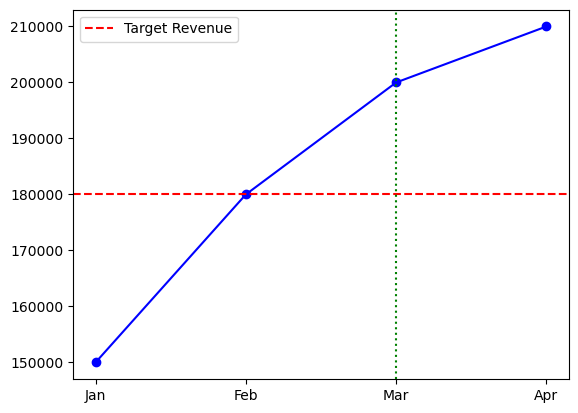

In [12]:
plt.plot(laptop_data['Month'], laptop_data['Revenue'], marker='o', color='blue')
plt.axhline(y=180000, color='red', linestyle='--', label='Target Revenue')
plt.axvline(x=2, color='green', linestyle=':')
plt.legend()
plt.show()

# Annotations

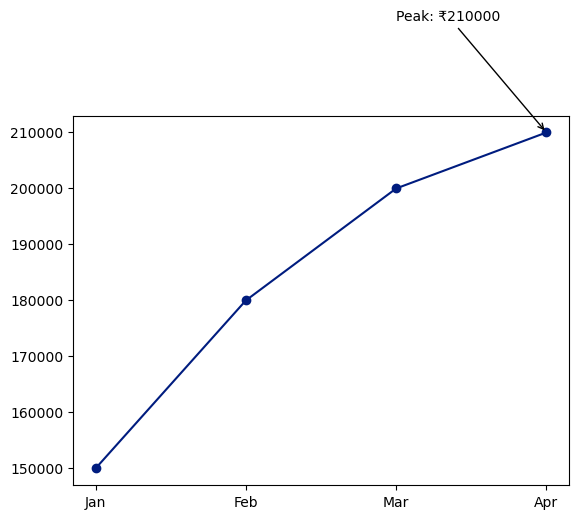

In [13]:
max_month = laptop_data.loc[laptop_data['Revenue'].idxmax(), 'Month']
max_value = laptop_data['Revenue'].max()

plt.plot(laptop_data['Month'], laptop_data['Revenue'], marker='o')
plt.annotate(f"Peak: ₹{max_value}", xy=(max_month, max_value),
             xytext=(2, max_value+20000),
             arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.show()

# Saving Figures

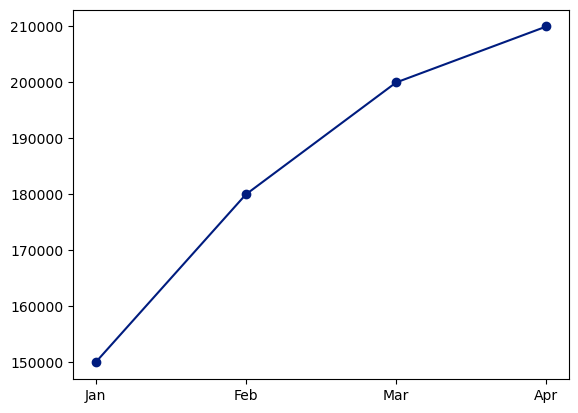

In [14]:
plt.plot(laptop_data['Month'], laptop_data['Revenue'], marker='o')
plt.savefig("laptop_revenue.png", dpi=300, bbox_inches='tight')